In [12]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

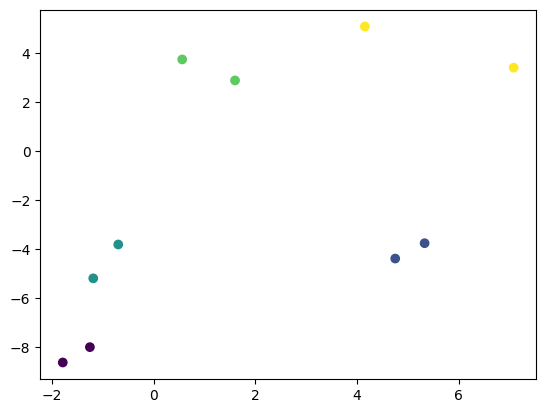

In [10]:
X, labels = make_blobs(n_samples=10, n_features=2, centers=5, random_state=40)

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

In [5]:
class AgglomerativeClustering:
    def __init__(self, linkage='single'):
        self.linkage = linkage
    
    def fit(self, X):
        n_samples = X.shape[0]
        self.labels_ = np.arange(n_samples)
        self.n_clusters_ = n_samples
        
        distances = self._calc_distances(X)
        
        while self.n_clusters_ > 1:
            # Find the indices of the nearest two clusters
            i, j = self._find_nearest(distances)
            
            # Merge the nearest two clusters
            self._merge_clusters(i, j)
            self.n_clusters_ -= 1
            
            # Update the distance matrix
            distances = self._update_distances(distances, i, j)
    
    def _calc_distances(self, X):
        # Calculate the pairwise distances between samples
        distances = np.zeros((X.shape[0], X.shape[0]))
        for i in range(X.shape[0]):
            for j in range(i+1, X.shape[0]):
                distances[i,j] = np.linalg.norm(X[i] - X[j])
        return distances
    
    def _find_nearest(self, distances):
        # Find the indices of the nearest two clusters
        if self.linkage == 'single':
            i, j = np.unravel_index(np.argmin(distances), distances.shape)
        elif self.linkage == 'complete':
            i, j = np.unravel_index(np.argmax(distances), distances.shape)
        else:
            i, j = np.unravel_index(np.argmin(distances), distances.shape)
        return i, j
    
    def _merge_clusters(self, i, j):
        # Merge the nearest two clusters
        mask = (self.labels_ == self.labels_[j])
        self.labels_[mask] = self.labels_[i]
        
    def _update_distances(self, distances, i, j):
        # Update the distance matrix
        if self.linkage == 'single':
            distances[i,:] = np.minimum(distances[i,:], distances[j,:])
            distances[:,i] = np.minimum(distances[:,i], distances[:,j])
        elif self.linkage == 'complete':
            distances[i,:] = np.maximum(distances[i,:], distances[j,:])
            distances[:,i] = np.maximum(distances[:,i], distances[:,j])
        else:
            distances[i,:] = np.minimum(distances[i,:], distances[j,:])
            distances[:,i] = np.minimum(distances[:,i], distances[:,j])
        distances = np.delete(distances, j, axis=0)
        distances = np.delete(distances, j, axis=1)
        return distances

In [72]:
n_samples = X.shape[0]
labels = np.arange(n_samples)
n_clusters = n_samples

In [68]:
# find the closets pairs
diff = X[:, np.newaxis, :] - X[np.newaxis, :, :]

distance_matrix = np.linalg.norm(diff, axis=2)

u_t = np.triu(distance_matrix)

# to find the minimum values
u_t[np.where(u_t == 0)] = np.inf

i, j = np.unravel_index(np.argmin(u_t), u_t.shape)

print(i, j)

8 9


In [75]:
# merge them
mask = (labels == labels[j])
mask

array([False, False, False, False, False, False, False, False, False,
        True])

In [77]:
labels[mask] = labels[i]

In [78]:
labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 8])

In [ ]:
# update the distance matrix
